In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import math 

In [2]:
df = pd.read_csv('../../processed_data/00-train.csv')
# df.columns
columns = [
  # 'user_id',
  # 'org_id', 
  # 'rating', 
  # 'ts', 
  'user_city', 
  'org_city',
  # 'average_bill', 
  'rating_org', # target
  # 'rubrics', 
  'food_delivery', 
  'breakfast',
  'takeaway', 
  'summer_terrace', 
  'wi_fi', 
  'business_lunch',
  'payment_by_credit_card', 
  'coffee_to_go', 
  'closed_for_quarantine',
  'online_takeaway', 
  'karaoke', 
  'special_menu', 
  'sports_broadcasts',
  'food_court1', 
  'craft_beer', 
  'projector', 
  'gift_certificate',
  'wheelchair_access', 
  'automatic_door', 
  'food_product_delivery',
  'car_park', 
  'parking_disabled', 
  'toilet_for_disabled', 
  'promotions',
  'cafe', 
  'minimum_order', 
  'free_delivery', 
  'self_service_kiosks',
  'has_restaurant', 
  'air_conditioning', 
  'pets', 
  'elevator', 
  'has_bar', 
  'internet access', 
  'privilege_tickets', 
  'organic_food', 
  'vip_zone',
  'hall_capacity', 
  'face_control',  
  'show_program', 
  'music',
  'chillout',
  'dancefloor', 
  'dress_code', 
  'billiards', 
  'strip', 
  'elevator_wheelchair_accessible', 
  'ramp', 
  'around_the_clock_work1',
  'pickup', 
  'farm_products', 
  'delivery', 
  'coffee_shop', 
  'call_button',
  'wheelchair_accessible', 
  'table_games', 
  'vinotheque', 
  'cakes_for_different_occasions',
  'accepted_credit_cards', 
  'kalyan', 
  'teahouse',
  'bread_from_tandoor',
  'handmade_goods', 

  'dateMM',
  'bill500', 
  'bill1000',
  'bill1500',
  'bill2000',
  'bill2500',
  'bill3000',
  'bill3500',
  'bill4000',
  'billExpensive', 
  # 'native_citizen', 
  # 'tourist', 
  'is_restraunt',
  'is_caffe', 
  'is_other',
  'resist_covid',
  'for_adult',
  "rating_1",
  "rating_2",
  "rating_3",
  "rating_4",
  "rating_5"
]

df1 = df[columns]
df1 = pd.get_dummies(df1)
df1.describe()

for col in df1.columns.values:
  if col.startswith('dateMM'):
    df1[col] = df1[col] * 1000
  if col in ['user_city_msk', 'user_city_spb', 'org_city_msk',
       'org_city_spb']:
    df1[col] = df1[col] * 100
  if col.startswith('bill'):
    df1[col] = df1[col] * 200
  if col.startswith('rating_') and col != "rating_org":
    df1[col] = df1[col] * 300
  if (col.startswith('is_')):
    df1[col] = df1[col] * 200
  if col == 'resist_covid' or col == 'for_adult':
    df1[col] = df1[col] * 50

train, test = train_test_split(df1, test_size=0.5)
target_column = 'rating_org'

train_x, train_y = train.drop(target_column, axis=1), train[target_column]
test_x, test_y = test.drop(target_column, axis=1), test[target_column]

model = KNeighborsRegressor(n_neighbors=5, weights='distance')
model.fit(train_x, train_y)

predict = model.predict(test_x)
print('MAPE:', mean_absolute_percentage_error(test_y, predict))

MAPE: 0.051719578213506937


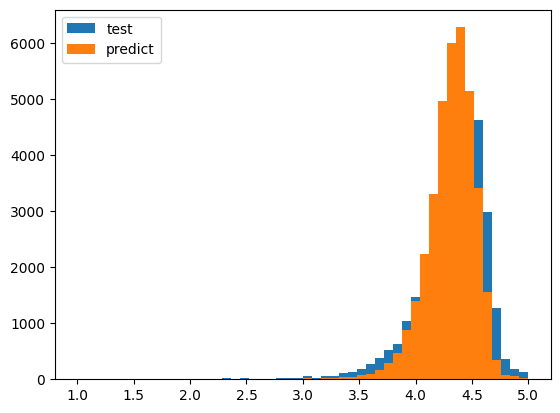

In [3]:
from matplotlib import pyplot as plt
plt.hist(test.rating_org, label="test",bins=50)
tmp = predict
plt.hist(tmp, label="predict", bins=50)
plt.legend()